In [1]:
# Dependencies and Setup
%matplotlib inline
%matplotlib notebook
import csv
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors

tablamun=pd.read_csv("../indicadores_municipios.csv",  encoding ='latin1')
pd.set_option('display.max_columns', 500)
tablamun.head()
# tablamun.count()
# tablamun.dtypes

,id_edo,id_mun,edo,municipio,escolaridad,idh,ictpc_mun_2010
0,9,2,Distrito Federal,Azcapotzalco,10.74,0.832,4588
1,9,3,Distrito Federal,Coyoacán,11.72,0.867,5674
2,9,4,Distrito Federal,Cuajimalpa de Morelos,10.43,0.825,6449
3,9,5,Distrito Federal,Gustavo A. Madero,9.96,0.806,3573
4,9,6,Distrito Federal,Iztacalco,10.59,0.822,4164


### Create dataframe for CMDX

In [2]:

cdmx= tablamun.loc[tablamun["id_edo"] == 9, :]
cdmx = cdmx.rename(columns = {"id_edo": "State ID", "edo": "State" , "id_mun":"Municipality ID", 
                          "municipio" : "Municipality", "escolaridad": "Average years of school",
                         "idh": "Human Development Index", "ictpc_mun_2010": "Average per capita income"}) 
cdmx["State per capita income"] = cdmx["Average per capita income"].mean()
cdmx["State HDI"] = cdmx["Human Development Index"].mean()
cdmx["HDI ranking"]= cdmx["Human Development Index"].rank(ascending=False)

cdmx.head()


,State ID,Municipality ID,State,Municipality,Average years of school,Human Development Index,Average per capita income,State per capita income,State HDI,HDI ranking
0,9,2,Distrito Federal,Azcapotzalco,10.74,0.832,4588,4698.875,0.823875,5.0
1,9,3,Distrito Federal,Coyoacán,11.72,0.867,5674,4698.875,0.823875,3.0
2,9,4,Distrito Federal,Cuajimalpa de Morelos,10.43,0.825,6449,4698.875,0.823875,7.0
3,9,5,Distrito Federal,Gustavo A. Madero,9.96,0.806,3573,4698.875,0.823875,12.5
4,9,6,Distrito Federal,Iztacalco,10.59,0.822,4164,4698.875,0.823875,8.0


### Create dataframe for Edomex

In [3]:
edomex= tablamun.loc[tablamun["id_edo"] == 15, :]
edomex = edomex.rename(columns = {"id_edo": "State ID", "edo": "State" , "id_mun":"Municipality ID", 
                          "municipio" : "Municipality", "escolaridad": "Average years of school",
                         "idh": "Human Development Index", "ictpc_mun_2010": "Average per capita income"}) 
edomex["State per capita income"] = edomex["Average per capita income"].mean()
edomex["State HDI"] = edomex["Human Development Index"].mean()
edomex["HDI ranking"]= edomex["Human Development Index"].rank(ascending=True)
edomex.head()
edomex.describe()


,State ID,Municipality ID,Average years of school,Human Development Index,Average per capita income,State per capita income,State HDI,HDI ranking
count,125.0,125.000000,125.000000,125.000000,125.000000,1.250000e+02,1.250000e+02,125.000000
mean,15.0,63.000000,7.413280,0.690456,2032.072000,2.032072e+03,6.904560e-01,63.000000
std,0.0,36.228442,1.609747,0.059216,794.997161,6.848660e-12,2.229381e-16,36.226216
min,15.0,1.000000,3.960000,0.545000,795.000000,2.032072e+03,6.904560e-01,1.000000
25%,15.0,32.000000,6.110000,0.646000,1524.000000,2.032072e+03,6.904560e-01,32.000000
50%,15.0,63.000000,7.570000,0.695000,1889.000000,2.032072e+03,6.904560e-01,63.000000
75%,15.0,94.000000,8.590000,0.735000,2258.000000,2.032072e+03,6.904560e-01,94.000000
max,15.0,125.000000,11.810000,0.825000,4753.000000,2.032072e+03,6.904560e-01,125.000000


### Create dataframe both states

In [4]:
tabla_tot = pd.concat([cdmx, edomex])
tabla_tot["HDI Ranking CDMX & Edomex"]= tabla_tot["Human Development Index"].rank(ascending=True)
tabla_tot.describe()

,State ID,Municipality ID,Average years of school,Human Development Index,Average per capita income,State per capita income,State HDI,HDI ranking,HDI Ranking CDMX & Edomex
count,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000
mean,14.319149,56.929078,7.780071,0.705596,2334.687943,2334.687943,0.705596,56.815603,71.000000
std,1.909821,38.143460,1.872220,0.071357,1252.901257,848.852747,0.042468,38.284714,40.845397
min,9.000000,1.000000,3.960000,0.545000,795.000000,2032.072000,0.690456,1.000000,1.000000
25%,15.000000,20.000000,6.350000,0.660000,1551.000000,2032.072000,0.690456,20.000000,36.000000
50%,15.000000,55.000000,7.960000,0.706000,1970.000000,2032.072000,0.690456,54.500000,71.000000
75%,15.000000,90.000000,8.979999,0.747000,2611.000000,2032.072000,0.690456,90.000000,106.000000
max,15.000000,125.000000,13.640000,0.917000,8902.000000,4698.875000,0.823875,125.000000,141.000000


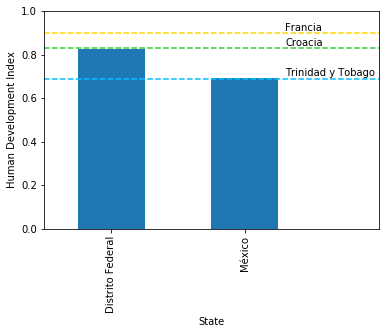

<Figure size 432x288 with 0 Axes>

In [5]:
# Create a group based on states
state_group = tabla_tot.groupby('State')
state_idh=state_group['Human Development Index'].mean()

# Create a bar chart 
state_idh_graph = state_idh.plot(kind='bar')

plt.xlim(-0.5, 2)
plt.ylim(0, 1)


# Set the xlabel and ylabel using class methods
state_idh_graph.set_xlabel("State")
state_idh_graph.set_ylabel("Human Development Index")


plt.axhline(y=0.830, color='limegreen', linestyle='--')
plt.text(1.3,0.84, 'Croacia')
plt.axhline(y=0.901, color='gold', linestyle='--')
plt.text(1.3,0.91, 'Francia')
plt.axhline(y=0.69, color='deepskyblue', linestyle='--')
plt.text(1.3,0.70, 'Trinidad y Tobago')

plt.show()
plt.tight_layout()

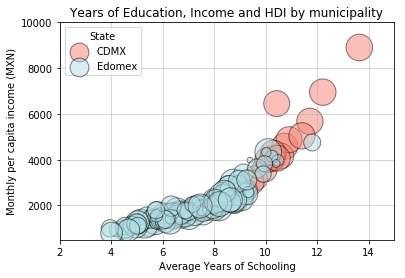

<Figure size 1440x1440 with 0 Axes>

In [6]:
# Build the scatter plot
fig, ax = plt.subplots()

plt.scatter(cdmx["Average years of school"], cdmx["Average per capita income"], marker="o", facecolors="salmon", edgecolors="black", 
             s=tabla_tot["HDI Ranking CDMX & Edomex"]*5, alpha=0.5, label="CDMX")
plt.scatter(edomex["Average years of school"], edomex["Average per capita income"], marker="o", facecolors="powderblue", edgecolors="black", 
              s=tabla_tot["HDI Ranking CDMX & Edomex"]*5 ,alpha=0.5,  label="Edomex")

# Incorporate the other graph properties

plt.xlim(2, 15)
plt.ylim(500, 10000)
ax.grid(linestyle='-', linewidth='0.5',)
plt.title('Years of Education, Income and HDI by municipality')

plt.xlabel('Average Years of Schooling')
plt.ylabel('Monthly per capita income (MXN)')

# Create a legend
plt.legend(loc="best", fancybox=True, title="State")

# # Incorporate a text label regarding circle size
# plt.text(42,35, 'Note:\nCircle size correlates with driver count per City')

# # Save Figure
# plt.savefig('PyberScatterPlot.png')
plt.figure(figsize=(20,20))
#Show plot
plt.show()

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:56: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



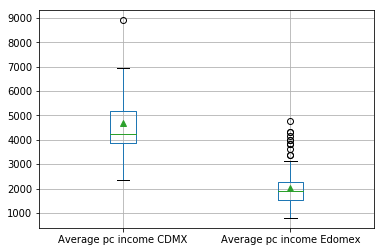

In [7]:
# Income quartiles

cdmx["Average per capita income"].describe()
edomex["Average per capita income"].describe()

# Income stats
cdmx_q1 = np.percentile(cdmx["Average per capita income"], 25)
cdmx_q3 = np.percentile(cdmx["Average per capita income"], 75)
cdmx_max = np.max(cdmx["Average per capita income"])
cdmx_min = np.min(cdmx["Average per capita income"])
cdmx_mean = np.mean(cdmx["Average per capita income"])

edomex_q1 = np.percentile(edomex["Average per capita income"], 25)
edomex_q3 = np.percentile(edomex["Average per capita income"], 75)
edomex_max = np.max(edomex["Average per capita income"])
edomex_min = np.min(edomex["Average per capita income"])
edomex_mean = np.mean(edomex["Average per capita income"])

# Outliers

cdmx_iqr = (cdmx_q3 - cdmx_q1)
cdmx_lb = cdmx_q1 - (1.5 * cdmx_iqr)
cdmx_ub = cdmx_q3 + (1.5 * cdmx_iqr)

cdmx['Very high income'] = cdmx['Average per capita income'].apply(lambda x: 1 if x >=cdmx_ub else 0)
cdmx['Very low income'] = cdmx['Average per capita income'].apply(lambda x: 1 if x <=cdmx_lb else 0)


edomex_iqr = (edomex_q3 - edomex_q1)
edomex_lb = edomex_q1 - (1.5 * edomex_iqr)
edomex_ub = edomex_q3 + (1.5 * edomex_iqr)

edomex['Very high income'] = edomex['Average per capita income'].apply(lambda x: 1 if x >=edomex_ub else 0)
edomex['Very low income'] = edomex['Average per capita income'].apply(lambda x: 1 if x <=edomex_lb else 0)

# Create bins
cdmx_bins = [cdmx_min-1, cdmx_q1,cdmx_mean,cdmx_q3 , cdmx_max+1]
cdmx_bins
edomex_bins = [edomex_min-1, edomex_q1,edomex_mean,edomex_q3 , edomex_max+1]
edomex_bins

# Create the names for the  bins
bins_names = [1, 2, 3, 4]

# Assign to bins based on average income
cdmx["Per capita income quartile"] = pd.cut(cdmx["Average per capita income"], cdmx_bins, labels=bins_names)
edomex["Per capita income quartile"] = pd.cut(edomex["Average per capita income"], edomex_bins, labels=bins_names)
edomex

cdmx["Average pc income CDMX"]=cdmx["Average per capita income"]
edomex["Average pc income Edomex"]=edomex["Average per capita income"]
cdmx["State"] = "CDMX"
edomex["State"] = "Edomex"

cdmx
tabla_tot2 = pd.concat([cdmx, edomex])

# Income boxplot 

tabla_tot2.boxplot(column=["Average pc income CDMX", "Average pc income Edomex"],  showmeans=True)
# plt.grid()
# plt.show()